# Tools

integrate with LLM to get interact with external system like API,tools etc

model will choose the tool based on query 

In [41]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from langchain_core.messages import AnyMessage,HumanMessage
from dotenv import load_dotenv
from typing import TypedDict,Annotated
from langgraph.graph.message import add_messages
load_dotenv()

True

In [42]:
# message state
class state(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]


In [43]:
llm=ChatGroq(model='llama-3.1-8b-instant')

In [44]:
# lets create tools

def add_tool(a:int,b:int)->int:
    '''add a and b
    Args:
    a(int): first number
    b(int):second number
    return a+b(int) '''
    return a+b

def multiply_tool(a:int,b:int)->int:
    '''multiply a and b
    Args:
    a(int): first number
    b(int):second number
    return a*b(int) '''
    return a*b

def subtract_tool(a:int,b:int)->int:
    '''subtract a and b
    Args:
    a(int): first number
    b(int):second number
    return a-b(int) '''
    return a-b

In [45]:
# langcahin built in tools
# wikipedia tool
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wiki_wrapper=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [46]:
# arxiv tool
from langchain_community.utilities import ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun
arxiv_wrapper=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_wrapper)

In [47]:
tools=[add_tool,multiply_tool,subtract_tool,wikipedia,arxiv]

In [48]:
llm_with_tool=llm.bind_tools(tools)

In [49]:
def llm_tool(state:state)->state:
    res=llm_with_tool.invoke(state['messages'])
    return {
        'messages':[res]
    }

In [50]:
tools=[add_tool,multiply_tool,subtract_tool,wikipedia,arxiv]

In [51]:
from langgraph.prebuilt import ToolNode,tools_condition

In [52]:
# graph

graph=StateGraph(state)
graph.add_node('chatbot',llm_tool)
graph.add_node('tools',ToolNode(tools))

graph.add_edge(START,'chatbot')
graph.add_conditional_edges('chatbot',
                            tools_condition) # if chatbot return tool call it will route to tool else END

graph.add_edge('tools',END)

workflow=graph.compile()

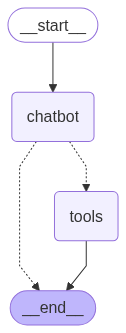

In [53]:
workflow

In [54]:
result=workflow.invoke(
    {'messages':'what is 4 - 4'}
)

In [55]:
result

{'messages': [HumanMessage(content='what is 4 - 4', additional_kwargs={}, response_metadata={}, id='14d2c2c4-7e3f-4abc-a23c-dd9b0016392c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'bgjwbxn2c', 'function': {'arguments': '{"a":4,"b":4}', 'name': 'subtract_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 722, 'total_tokens': 742, 'completion_time': 0.033304635, 'prompt_time': 0.9370037, 'queue_time': 0.257854676, 'total_time': 0.970308335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_2115512ff6', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2411ac19-c680-4a10-b419-6a8292f48c7f-0', tool_calls=[{'name': 'subtract_tool', 'args': {'a': 4, 'b': 4}, 'id': 'bgjwbxn2c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 722, 'output_tokens': 20, 'total_tokens': 742}),
  ToolMessage(content='0', name='subtract_tool', id='9719952d-bb9a-4b5e-a699-274c

In [56]:
from pprint import pprint

In [57]:
for res in result['messages']:
    res.pretty_print()

================================ Human Message =================================

what is 4 - 4
================================== Ai Message ==================================
Tool Calls:
  subtract_tool (bgjwbxn2c)
 Call ID: bgjwbxn2c
  Args:
    a: 4
    b: 4
================================= Tool Message =================================
Name: subtract_tool

0


In [58]:
result=workflow.invoke(
    {'messages':'i want this paper abstract Attention all you need'}
)

In [59]:
result

{'messages': [HumanMessage(content='i want this paper abstract Attention all you need', additional_kwargs={}, response_metadata={}, id='68e2b1c1-dae2-4965-906c-04d19c3d9bab'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'm9rgwx7cm', 'function': {'arguments': '{"query":"Attention is all you need"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 724, 'total_tokens': 743, 'completion_time': 0.031513107, 'prompt_time': 0.689111583, 'queue_time': 0.136873016, 'total_time': 0.72062469}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c40956ddc4', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b172f321-4c02-49d9-99d0-22347abdac2a-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'Attention is all you need'}, 'id': 'm9rgwx7cm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 724, 'output_tokens': 19, 'total_tokens': 743}),
  ToolMessage(

In [60]:
result=workflow.invoke(
    {'messages':'what is python'}
)

In [61]:
result

{'messages': [HumanMessage(content='what is python', additional_kwargs={}, response_metadata={}, id='cf21df87-dc20-4e77-adcd-e08d54fe79ce'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '92mg0r77g', 'function': {'arguments': '{"query":"Python programming language"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 718, 'total_tokens': 734, 'completion_time': 0.026256484, 'prompt_time': 0.045304842, 'queue_time': 0.125910238, 'total_time': 0.071561326}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7083106d2c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--654dc0ef-ccbb-4590-a103-90ac5c2cd5fa-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Python programming language'}, 'id': '92mg0r77g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 718, 'output_tokens': 16, 'total_tokens': 734}),
  ToolMessage(content='Page: Python 